# Calculate the Energy flux in the simplest way possible in physical space

In [2]:
cd tasman-tides

/home/149/ab8992/tasman-tides


In [4]:
import argparse
import ttidelib as tt
import os
# os.chdir("tasman-tides")
import subprocess
import time
from dask.distributed import Client,default_client
from matplotlib import pyplot as plt
from pathlib import Path
home = Path("/home/149/ab8992/tasman-tides")
gdata = Path("/g/data/nm03/ab8992")


def startdask():
    try:
    # Try to get the existing Dask client
        client = default_client()
        print(client)
    except ValueError:
        # If there's no existing client, create a new one
        client = Client()

startdask()

In [22]:
## Go through and rename every dissipation file . they're currently called 'velocity_laplacian'
import subprocess
files = Path("/g/data/nm03/ab8992/postprocessed/")
paths = [i for i in files.glob("**/dissipation/transect/*.nc")]

for i in paths:
    print(
        subprocess.run(
        f"ncrename -v velocity_laplacian,dissipation {str(i)}",
            shell = True
    ))
    print(str(i))



CompletedProcess(args='ncrename -v velocity_laplacian,dissipation /g/data/nm03/ab8992/postprocessed/notide-40/dissipation/topdown/dissipation_time-76.nc', returncode=0)
ERROR: nco__open() unable to open file "/g/data/nm03/ab8992/postprocessed/full-20/dissipation/topdown/dissipation_time-523.nc"
ERROR NC_EHDFERR Error at HDF5 layer
HINT: NC_EHDFERR errors indicate that the HDF5-backend to netCDF is unable to perform the requested task. NCO can receive this devilishly inscrutable error for a variety of possible reasons including: 1) The run-time dynamic linker attempts to resolve calls from the netCDF library to the HDF library with an HDF5 libhdf5.a that is incompatible with the version used to build NCO and netCDF. 2) The file system does not allow the HDF5 flock() function, as of HDF5 1.10.x, to enable multiple processes to open the same file for reading, a feature known as SWMR (Single Write Multiple Read). The fix is to disable the HDF5 flock() by setting an environment variable thu

nco_err_exit(): ERROR Short NCO-generated message (usually name of function that triggered error): nco__open()
nco_err_exit(): ERROR Error code is -101. Translation into English with nc_strerror(-101) is "NetCDF: HDF error"
nco_err_exit(): ERROR Short NCO-generated message (usually name of function that triggered error): nco__open()
nco_err_exit(): ERROR Error code is -101. Translation into English with nc_strerror(-101) is "NetCDF: HDF error"
nco_err_exit(): ERROR Short NCO-generated message (usually name of function that triggered error): nco__open()
nco_err_exit(): ERROR Error code is -101. Translation into English with nc_strerror(-101) is "NetCDF: HDF error"
nco_err_exit(): ERROR Short NCO-generated message (usually name of function that triggered error): nco__open()
nco_err_exit(): ERROR Error code is -101. Translation into English with nc_strerror(-101) is "NetCDF: HDF error"
nco_err_exit(): ERROR Short NCO-generated message (usually name of function that triggered error): nco__

ERROR: nco__open() unable to open file "/g/data/nm03/ab8992/postprocessed/full-20/dissipation/topdown/dissipation_time-225.nc"
ERROR NC_EHDFERR Error at HDF5 layer
HINT: NC_EHDFERR errors indicate that the HDF5-backend to netCDF is unable to perform the requested task. NCO can receive this devilishly inscrutable error for a variety of possible reasons including: 1) The run-time dynamic linker attempts to resolve calls from the netCDF library to the HDF library with an HDF5 libhdf5.a that is incompatible with the version used to build NCO and netCDF. 2) The file system does not allow the HDF5 flock() function, as of HDF5 1.10.x, to enable multiple processes to open the same file for reading, a feature known as SWMR (Single Write Multiple Read). The fix is to disable the HDF5 flock() by setting an environment variable thusly: "export HDF5_USE_FILE_LOCKING=FALSE". 3) An incorrect netCDF4 library implementation of a procedure (e.g., nc_rename_var()) in terms of HDF function calls (e.g., HD

nco_err_exit(): ERROR Short NCO-generated message (usually name of function that triggered error): nco__open()
nco_err_exit(): ERROR Error code is -101. Translation into English with nc_strerror(-101) is "NetCDF: HDF error"
nco_err_exit(): ERROR Short NCO-generated message (usually name of function that triggered error): nco__open()
nco_err_exit(): ERROR Error code is -101. Translation into English with nc_strerror(-101) is "NetCDF: HDF error"
nco_err_exit(): ERROR Short NCO-generated message (usually name of function that triggered error): nco__open()
nco_err_exit(): ERROR Error code is -101. Translation into English with nc_strerror(-101) is "NetCDF: HDF error"
nco_err_exit(): ERROR Short NCO-generated message (usually name of function that triggered error): nco__open()
nco_err_exit(): ERROR Error code is -101. Translation into English with nc_strerror(-101) is "NetCDF: HDF error"
nco_err_exit(): ERROR Short NCO-generated message (usually name of function that triggered error): nco__

ERROR: nco__open() unable to open file "/g/data/nm03/ab8992/postprocessed/full-20/dissipation/topdown/dissipation_time-1864.nc"
ERROR NC_EHDFERR Error at HDF5 layer
HINT: NC_EHDFERR errors indicate that the HDF5-backend to netCDF is unable to perform the requested task. NCO can receive this devilishly inscrutable error for a variety of possible reasons including: 1) The run-time dynamic linker attempts to resolve calls from the netCDF library to the HDF library with an HDF5 libhdf5.a that is incompatible with the version used to build NCO and netCDF. 2) The file system does not allow the HDF5 flock() function, as of HDF5 1.10.x, to enable multiple processes to open the same file for reading, a feature known as SWMR (Single Write Multiple Read). The fix is to disable the HDF5 flock() by setting an environment variable thusly: "export HDF5_USE_FILE_LOCKING=FALSE". 3) An incorrect netCDF4 library implementation of a procedure (e.g., nc_rename_var()) in terms of HDF function calls (e.g., H

nco_err_exit(): ERROR Short NCO-generated message (usually name of function that triggered error): nco__open()
nco_err_exit(): ERROR Error code is -101. Translation into English with nc_strerror(-101) is "NetCDF: HDF error"
nco_err_exit(): ERROR Short NCO-generated message (usually name of function that triggered error): nco__open()
nco_err_exit(): ERROR Error code is -101. Translation into English with nc_strerror(-101) is "NetCDF: HDF error"
nco_err_exit(): ERROR Short NCO-generated message (usually name of function that triggered error): nco__open()
nco_err_exit(): ERROR Error code is -101. Translation into English with nc_strerror(-101) is "NetCDF: HDF error"
nco_err_exit(): ERROR Short NCO-generated message (usually name of function that triggered error): nco__open()
nco_err_exit(): ERROR Error code is -101. Translation into English with nc_strerror(-101) is "NetCDF: HDF error"
nco_err_exit(): ERROR Short NCO-generated message (usually name of function that triggered error): nco__

ERROR: nco__open() unable to open file "/g/data/nm03/ab8992/postprocessed/full-20/dissipation/topdown/dissipation_time-3354.nc"
ERROR NC_EHDFERR Error at HDF5 layer
HINT: NC_EHDFERR errors indicate that the HDF5-backend to netCDF is unable to perform the requested task. NCO can receive this devilishly inscrutable error for a variety of possible reasons including: 1) The run-time dynamic linker attempts to resolve calls from the netCDF library to the HDF library with an HDF5 libhdf5.a that is incompatible with the version used to build NCO and netCDF. 2) The file system does not allow the HDF5 flock() function, as of HDF5 1.10.x, to enable multiple processes to open the same file for reading, a feature known as SWMR (Single Write Multiple Read). The fix is to disable the HDF5 flock() by setting an environment variable thusly: "export HDF5_USE_FILE_LOCKING=FALSE". 3) An incorrect netCDF4 library implementation of a procedure (e.g., nc_rename_var()) in terms of HDF function calls (e.g., H

nco_err_exit(): ERROR Short NCO-generated message (usually name of function that triggered error): nco__open()
nco_err_exit(): ERROR Error code is -101. Translation into English with nc_strerror(-101) is "NetCDF: HDF error"
nco_err_exit(): ERROR Short NCO-generated message (usually name of function that triggered error): nco__open()
nco_err_exit(): ERROR Error code is -101. Translation into English with nc_strerror(-101) is "NetCDF: HDF error"
nco_err_exit(): ERROR Short NCO-generated message (usually name of function that triggered error): nco__open()
nco_err_exit(): ERROR Error code is -101. Translation into English with nc_strerror(-101) is "NetCDF: HDF error"
nco_err_exit(): ERROR Short NCO-generated message (usually name of function that triggered error): nco__open()
nco_err_exit(): ERROR Error code is -101. Translation into English with nc_strerror(-101) is "NetCDF: HDF error"
nco_err_exit(): ERROR Short NCO-generated message (usually name of function that triggered error): nco__

ERROR: nco__open() unable to open file "/g/data/nm03/ab8992/postprocessed/full-20/dissipation/topdown/dissipation_time-4844.nc"
ERROR NC_EHDFERR Error at HDF5 layer
HINT: NC_EHDFERR errors indicate that the HDF5-backend to netCDF is unable to perform the requested task. NCO can receive this devilishly inscrutable error for a variety of possible reasons including: 1) The run-time dynamic linker attempts to resolve calls from the netCDF library to the HDF library with an HDF5 libhdf5.a that is incompatible with the version used to build NCO and netCDF. 2) The file system does not allow the HDF5 flock() function, as of HDF5 1.10.x, to enable multiple processes to open the same file for reading, a feature known as SWMR (Single Write Multiple Read). The fix is to disable the HDF5 flock() by setting an environment variable thusly: "export HDF5_USE_FILE_LOCKING=FALSE". 3) An incorrect netCDF4 library implementation of a procedure (e.g., nc_rename_var()) in terms of HDF function calls (e.g., H

nco_err_exit(): ERROR Short NCO-generated message (usually name of function that triggered error): nco__open()
nco_err_exit(): ERROR Error code is -101. Translation into English with nc_strerror(-101) is "NetCDF: HDF error"
nco_err_exit(): ERROR Short NCO-generated message (usually name of function that triggered error): nco__open()
nco_err_exit(): ERROR Error code is -101. Translation into English with nc_strerror(-101) is "NetCDF: HDF error"
nco_err_exit(): ERROR Short NCO-generated message (usually name of function that triggered error): nco__open()
nco_err_exit(): ERROR Error code is -101. Translation into English with nc_strerror(-101) is "NetCDF: HDF error"
nco_err_exit(): ERROR Short NCO-generated message (usually name of function that triggered error): nco__open()
nco_err_exit(): ERROR Error code is -101. Translation into English with nc_strerror(-101) is "NetCDF: HDF error"
nco_err_exit(): ERROR Short NCO-generated message (usually name of function that triggered error): nco__

ERROR: nco__open() unable to open file "/g/data/nm03/ab8992/postprocessed/full-20/dissipation/topdown/dissipation_time-6632.nc"
ERROR NC_EHDFERR Error at HDF5 layer
HINT: NC_EHDFERR errors indicate that the HDF5-backend to netCDF is unable to perform the requested task. NCO can receive this devilishly inscrutable error for a variety of possible reasons including: 1) The run-time dynamic linker attempts to resolve calls from the netCDF library to the HDF library with an HDF5 libhdf5.a that is incompatible with the version used to build NCO and netCDF. 2) The file system does not allow the HDF5 flock() function, as of HDF5 1.10.x, to enable multiple processes to open the same file for reading, a feature known as SWMR (Single Write Multiple Read). The fix is to disable the HDF5 flock() by setting an environment variable thusly: "export HDF5_USE_FILE_LOCKING=FALSE". 3) An incorrect netCDF4 library implementation of a procedure (e.g., nc_rename_var()) in terms of HDF function calls (e.g., H

nco_err_exit(): ERROR Short NCO-generated message (usually name of function that triggered error): nco__open()
nco_err_exit(): ERROR Error code is -101. Translation into English with nc_strerror(-101) is "NetCDF: HDF error"
nco_err_exit(): ERROR Short NCO-generated message (usually name of function that triggered error): nco__open()
nco_err_exit(): ERROR Error code is -101. Translation into English with nc_strerror(-101) is "NetCDF: HDF error"
nco_err_exit(): ERROR Short NCO-generated message (usually name of function that triggered error): nco__open()
nco_err_exit(): ERROR Error code is -101. Translation into English with nc_strerror(-101) is "NetCDF: HDF error"
nco_err_exit(): ERROR Short NCO-generated message (usually name of function that triggered error): nco__open()
nco_err_exit(): ERROR Error code is -101. Translation into English with nc_strerror(-101) is "NetCDF: HDF error"
nco_err_exit(): ERROR Short NCO-generated message (usually name of function that triggered error): nco__

ERROR: nco__open() unable to open file "/g/data/nm03/ab8992/postprocessed/full-20/dissipation/topdown/dissipation_time-5738.nc"
ERROR NC_EHDFERR Error at HDF5 layer
HINT: NC_EHDFERR errors indicate that the HDF5-backend to netCDF is unable to perform the requested task. NCO can receive this devilishly inscrutable error for a variety of possible reasons including: 1) The run-time dynamic linker attempts to resolve calls from the netCDF library to the HDF library with an HDF5 libhdf5.a that is incompatible with the version used to build NCO and netCDF. 2) The file system does not allow the HDF5 flock() function, as of HDF5 1.10.x, to enable multiple processes to open the same file for reading, a feature known as SWMR (Single Write Multiple Read). The fix is to disable the HDF5 flock() by setting an environment variable thusly: "export HDF5_USE_FILE_LOCKING=FALSE". 3) An incorrect netCDF4 library implementation of a procedure (e.g., nc_rename_var()) in terms of HDF function calls (e.g., H

nco_err_exit(): ERROR Short NCO-generated message (usually name of function that triggered error): nco__open()
nco_err_exit(): ERROR Error code is -101. Translation into English with nc_strerror(-101) is "NetCDF: HDF error"
nco_err_exit(): ERROR Short NCO-generated message (usually name of function that triggered error): nco__open()
nco_err_exit(): ERROR Error code is -101. Translation into English with nc_strerror(-101) is "NetCDF: HDF error"
nco_err_exit(): ERROR Short NCO-generated message (usually name of function that triggered error): nco__open()
nco_err_exit(): ERROR Error code is -101. Translation into English with nc_strerror(-101) is "NetCDF: HDF error"
nco_err_exit(): ERROR Short NCO-generated message (usually name of function that triggered error): nco__open()
nco_err_exit(): ERROR Error code is -101. Translation into English with nc_strerror(-101) is "NetCDF: HDF error"
nco_err_exit(): ERROR Short NCO-generated message (usually name of function that triggered error): nco__

ERROR: nco__open() unable to open file "/g/data/nm03/ab8992/postprocessed/full-20/dissipation/topdown/dissipation_time-7377.nc"
ERROR NC_EHDFERR Error at HDF5 layer
HINT: NC_EHDFERR errors indicate that the HDF5-backend to netCDF is unable to perform the requested task. NCO can receive this devilishly inscrutable error for a variety of possible reasons including: 1) The run-time dynamic linker attempts to resolve calls from the netCDF library to the HDF library with an HDF5 libhdf5.a that is incompatible with the version used to build NCO and netCDF. 2) The file system does not allow the HDF5 flock() function, as of HDF5 1.10.x, to enable multiple processes to open the same file for reading, a feature known as SWMR (Single Write Multiple Read). The fix is to disable the HDF5 flock() by setting an environment variable thusly: "export HDF5_USE_FILE_LOCKING=FALSE". 3) An incorrect netCDF4 library implementation of a procedure (e.g., nc_rename_var()) in terms of HDF function calls (e.g., H

nco_err_exit(): ERROR Short NCO-generated message (usually name of function that triggered error): nco__open()
nco_err_exit(): ERROR Error code is -101. Translation into English with nc_strerror(-101) is "NetCDF: HDF error"
nco_err_exit(): ERROR Short NCO-generated message (usually name of function that triggered error): nco__open()
nco_err_exit(): ERROR Error code is -101. Translation into English with nc_strerror(-101) is "NetCDF: HDF error"
nco_err_exit(): ERROR Short NCO-generated message (usually name of function that triggered error): nco__open()
nco_err_exit(): ERROR Error code is -101. Translation into English with nc_strerror(-101) is "NetCDF: HDF error"
nco_err_exit(): ERROR Short NCO-generated message (usually name of function that triggered error): nco__open()
nco_err_exit(): ERROR Error code is -101. Translation into English with nc_strerror(-101) is "NetCDF: HDF error"
nco_err_exit(): ERROR Short NCO-generated message (usually name of function that triggered error): nco__

ERROR: nco__open() unable to open file "/g/data/nm03/ab8992/postprocessed/full-20/dissipation/topdown/dissipation_time-4248.nc"
ERROR NC_EHDFERR Error at HDF5 layer
HINT: NC_EHDFERR errors indicate that the HDF5-backend to netCDF is unable to perform the requested task. NCO can receive this devilishly inscrutable error for a variety of possible reasons including: 1) The run-time dynamic linker attempts to resolve calls from the netCDF library to the HDF library with an HDF5 libhdf5.a that is incompatible with the version used to build NCO and netCDF. 2) The file system does not allow the HDF5 flock() function, as of HDF5 1.10.x, to enable multiple processes to open the same file for reading, a feature known as SWMR (Single Write Multiple Read). The fix is to disable the HDF5 flock() by setting an environment variable thusly: "export HDF5_USE_FILE_LOCKING=FALSE". 3) An incorrect netCDF4 library implementation of a procedure (e.g., nc_rename_var()) in terms of HDF function calls (e.g., H

nco_err_exit(): ERROR Short NCO-generated message (usually name of function that triggered error): nco__open()
nco_err_exit(): ERROR Error code is -101. Translation into English with nc_strerror(-101) is "NetCDF: HDF error"
nco_err_exit(): ERROR Short NCO-generated message (usually name of function that triggered error): nco__open()
nco_err_exit(): ERROR Error code is -101. Translation into English with nc_strerror(-101) is "NetCDF: HDF error"
nco_err_exit(): ERROR Short NCO-generated message (usually name of function that triggered error): nco__open()
nco_err_exit(): ERROR Error code is -101. Translation into English with nc_strerror(-101) is "NetCDF: HDF error"
nco_err_exit(): ERROR Short NCO-generated message (usually name of function that triggered error): nco__open()
nco_err_exit(): ERROR Error code is -101. Translation into English with nc_strerror(-101) is "NetCDF: HDF error"
nco_err_exit(): ERROR Short NCO-generated message (usually name of function that triggered error): nco__

ERROR: nco__open() unable to open file "/g/data/nm03/ab8992/postprocessed/full-20/dissipation/topdown/dissipation_time-5142.nc"
ERROR NC_EHDFERR Error at HDF5 layer
HINT: NC_EHDFERR errors indicate that the HDF5-backend to netCDF is unable to perform the requested task. NCO can receive this devilishly inscrutable error for a variety of possible reasons including: 1) The run-time dynamic linker attempts to resolve calls from the netCDF library to the HDF library with an HDF5 libhdf5.a that is incompatible with the version used to build NCO and netCDF. 2) The file system does not allow the HDF5 flock() function, as of HDF5 1.10.x, to enable multiple processes to open the same file for reading, a feature known as SWMR (Single Write Multiple Read). The fix is to disable the HDF5 flock() by setting an environment variable thusly: "export HDF5_USE_FILE_LOCKING=FALSE". 3) An incorrect netCDF4 library implementation of a procedure (e.g., nc_rename_var()) in terms of HDF function calls (e.g., H

nco_err_exit(): ERROR Short NCO-generated message (usually name of function that triggered error): nco__open()
nco_err_exit(): ERROR Error code is -101. Translation into English with nc_strerror(-101) is "NetCDF: HDF error"
nco_err_exit(): ERROR Short NCO-generated message (usually name of function that triggered error): nco__open()
nco_err_exit(): ERROR Error code is -101. Translation into English with nc_strerror(-101) is "NetCDF: HDF error"
nco_err_exit(): ERROR Short NCO-generated message (usually name of function that triggered error): nco__open()
nco_err_exit(): ERROR Error code is -101. Translation into English with nc_strerror(-101) is "NetCDF: HDF error"


CompletedProcess(args='ncrename -v velocity_laplacian,dissipation /g/data/nm03/ab8992/postprocessed/notide-20/dissipation/topdown/dissipation_time-523.nc', returncode=0)
CompletedProcess(args='ncrename -v velocity_laplacian,dissipation /g/data/nm03/ab8992/postprocessed/notide-20/dissipation/topdown/dissipation_time-7824.nc', returncode=0)
CompletedProcess(args='ncrename -v velocity_laplacian,dissipation /g/data/nm03/ab8992/postprocessed/notide-20/dissipation/topdown/dissipation_time-1566.nc', returncode=0)
CompletedProcess(args='ncrename -v velocity_laplacian,dissipation /g/data/nm03/ab8992/postprocessed/notide-20/dissipation/topdown/dissipation_time-7228.nc', returncode=0)
CompletedProcess(args='ncrename -v velocity_laplacian,dissipation /g/data/nm03/ab8992/postprocessed/notide-20/dissipation/topdown/dissipation_time-2609.nc', returncode=0)
CompletedProcess(args='ncrename -v velocity_laplacian,dissipation /g/data/nm03/ab8992/postprocessed/notide-20/dissipation/topdown/dissipation_time

In [46]:
data = tt.collect_data("full-20",ppdata = ["dissipation"],bathy = True)
vdata = tt.collect_data("full-20",ppdata = ["vorticity"],bathy = True)

data



<xarray.Dataset>
Dimensions:               (xb: 376, yb: 101, time: 57, zl: 100)
Coordinates:
  * xb                    (xb) float64 -0.0 4.0 8.0 ... 1.496e+03 1.5e+03
  * yb                    (yb) float64 -200.0 -196.0 -192.0 ... 196.0 200.0
  * time                  (time) float64 76.0 225.0 374.0 ... 8.271e+03 8.42e+03
  * zl                    (zl) float64 2.704 8.126 13.58 ... 5.339e+03 5.443e+03
    lon                   (yb, xb) float64 dask.array<chunksize=(101, 376), meta=np.ndarray>
    lat                   (yb, xb) float64 dask.array<chunksize=(101, 376), meta=np.ndarray>
Data variables:
    dissipation_topdown   (time, yb, xb) float64 dask.array<chunksize=(1, 101, 376), meta=np.ndarray>
    dissipation_transect  (time, zl, xb) float64 dask.array<chunksize=(1, 100, 376), meta=np.ndarray>
    bathy                 (yb, xb) float64 dask.array<chunksize=(101, 376), meta=np.ndarray>
Attributes:
    history:  Mon Jan  8 16:24:56 2024: ncrename -v .velocity_laplacian,dissi...
    NCO:      netCDF Operators version 5.1.4 (Homepage = http://nco.sf.net, C...

In [60]:
vdata.time.values - data.time.values

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1.])

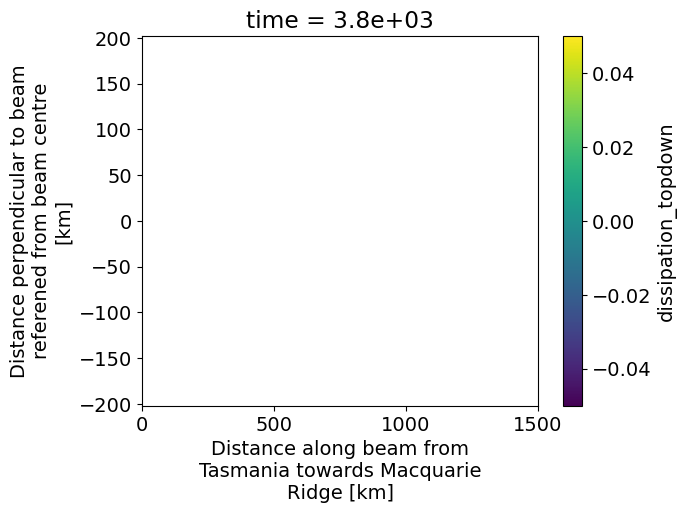

In [56]:
import xarray as xr
combined = xr.merge([vdata,data])

combined["dissipation_topdown"].isel(time = 50).plot()

loaded data
<xarray.Dataset>
Dimensions:               (xb: 376, yb: 101, time: 114, zl: 100)
Coordinates:
  * xb                    (xb) float64 -0.0 4.0 8.0 ... 1.496e+03 1.5e+03
  * yb                    (yb) float64 -200.0 -196.0 -192.0 ... 196.0 200.0
  * time                  (time) float64 75.0 76.0 224.0 ... 8.419e+03 8.42e+03
  * zl                    (zl) float64 2.704 8.126 13.58 ... 5.339e+03 5.443e+03
    lon                   (yb, xb) float64 dask.array<chunksize=(101, 376), meta=np.ndarray>
    lat                   (yb, xb) float64 dask.array<chunksize=(101, 376), meta=np.ndarray>
Data variables:
    vorticity_topdown     (time, yb, xb) float32 dask.array<chunksize=(2, 101, 376), meta=np.ndarray>
    vorticity_transect    (time, zl, xb) float32 dask.array<chunksize=(2, 100, 376), meta=np.ndarray>
    dissipation_topdown   (time, yb, xb) float64 dask.array<chunksize=(3, 101, 376), meta=np.ndarray>
    dissipation_transect  (time, zl, xb) float64 dask.array<chunksize=(3, 

/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.07/lib/python3.10/site-packages/xarray/plot/dataarray_plot.py:2026: UserWarning: The following kwargs were not used by contour: 'linestyle'
  primitive = ax.contour(x, y, z, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.07/lib/python3.10/site-packages/xarray/plot/dataarray_plot.py:2026: UserWarning: The following kwargs were not used by contour: 'linestyle'
  primitive = ax.contour(x, y, z, **kwargs)


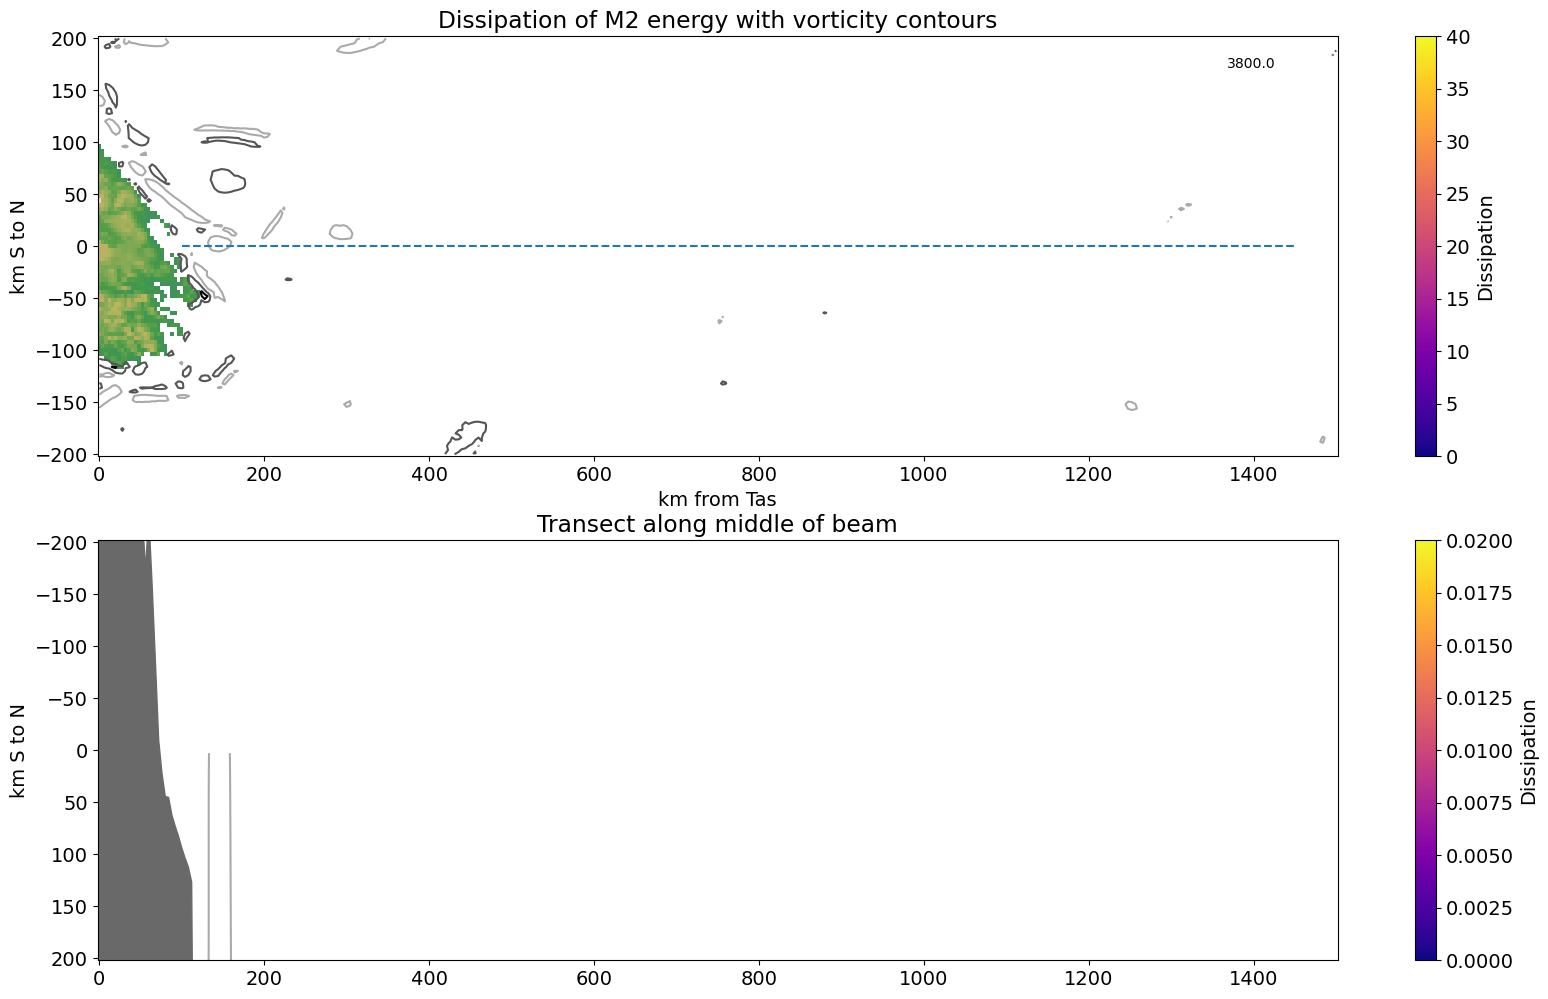

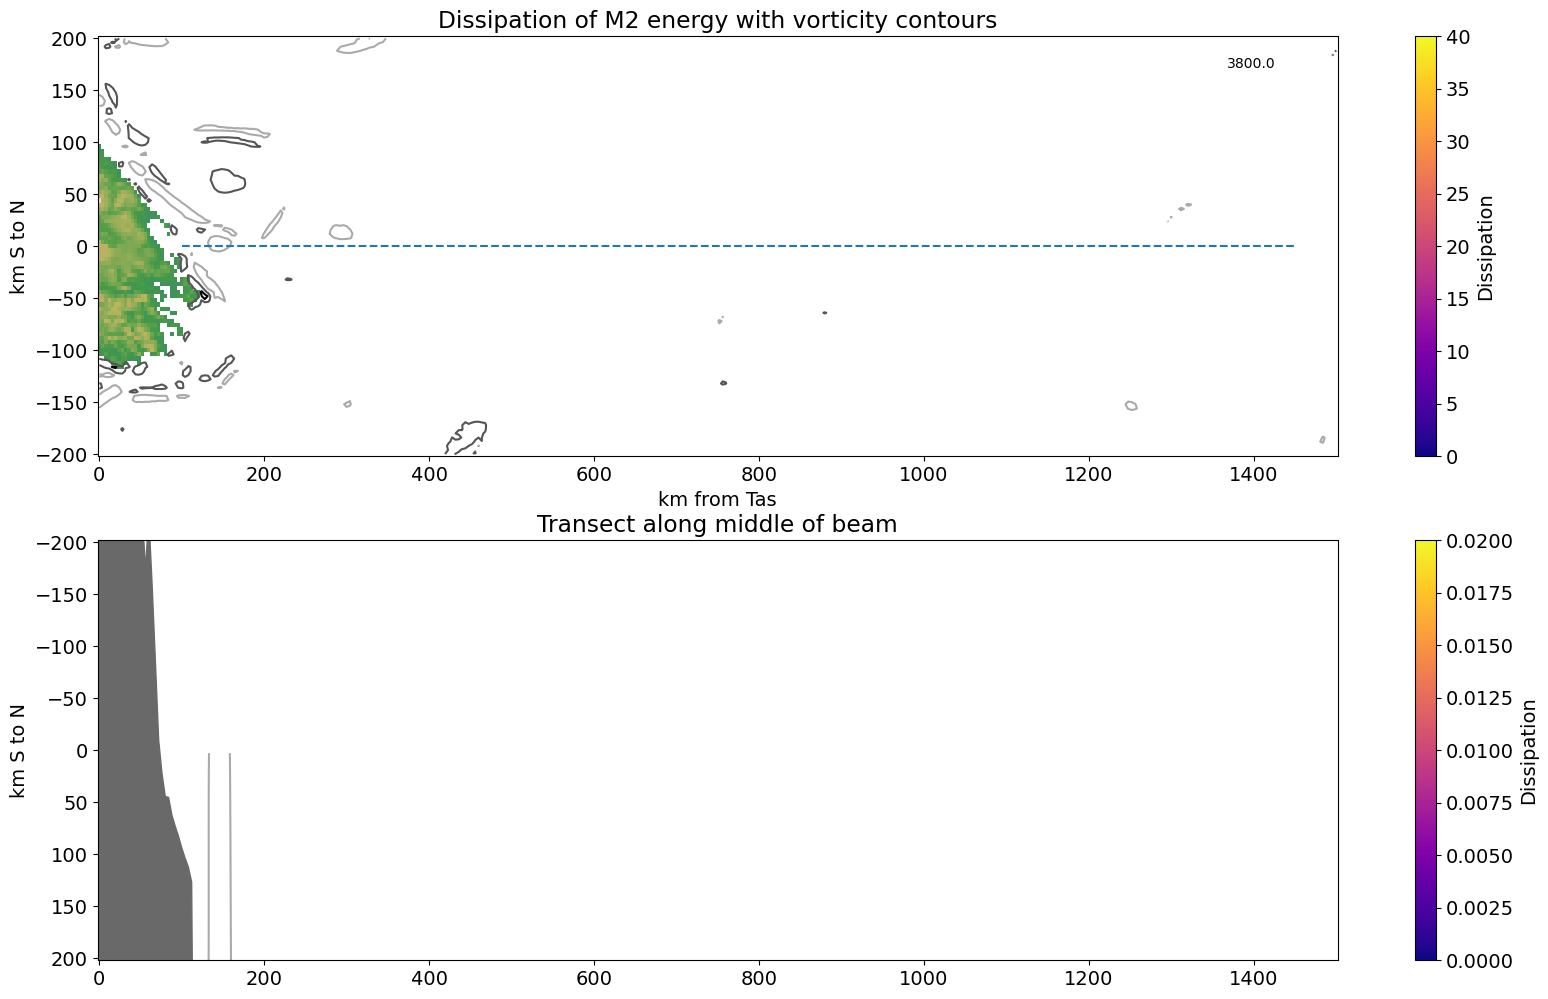

In [37]:
%matplotlib inline
print("loaded data")
print(data)
# fig,ax = plt.subplots(1,figsize=(20, 12))

tt.plot_dissipation(data.isel(time = 50))

In [35]:
data.isel(time = 20).vorticity_topdown.values

array([[-0.01420035, -0.00899919, -0.0029801 , ..., -0.00010521,
         0.00137128,  0.00176429],
       [ 0.00128752, -0.00294768, -0.00689161, ...,  0.00182143,
         0.00388285,  0.00582221],
       [-0.00484637, -0.00520407, -0.00090484, ...,  0.00525836,
         0.00774997,  0.00989079],
       ...,
       [ 0.01287543,  0.00809672,  0.02645128, ...,  0.00787612,
         0.01803344,  0.02140758],
       [ 0.        ,  0.        ,  0.        , ...,  0.00738981,
         0.01770902,  0.01816427],
       [ 0.        ,  0.        ,  0.        , ...,  0.00568287,
         0.01852349,  0.02082922]], dtype=float32)